### Do required imports

In [1]:
from __future__ import print_function
import tweepy
import json
from pymongo import MongoClient

### Setup your mongo path

In [2]:
MONGO_HOST = 'mongodb://localhost/twitterdb'

### Prepare a search keywords

In [3]:
WORDS =['#bigdata','#AI','#datascience','#machinelearning','#ml','#iot']

### Set up Twitter API tokens and consumder keys

In [4]:
CONSUMER_KEY='vwCAn6JbypbkrVXOBMbMrqQvO'
CONSUMER_SECRET='oqltY6Xls78JhS37sss10ZW6oKBIyPIqyw9ZStzwhVWuhVl6gv'
ACCESS_KEY='1337046363838828545-Dh901imr730DwV9VDKq3XVxRnWYqHU'
ACCESS_SECRET='LSsztMDGPhoTeBOoS284i4kESzM4p2zsqOIx7tFopKjNG'

In [5]:
class StreamListener(tweepy.StreamListener):
    # This is the class provided by tweepy to access twitter Streaming API

    def on_connect(self):
        # called initially to connect to the streaming API
        print("you are connected to the streaming API")
    
    
    def on_error(self,status_code):
        # on error - if an error occurs displays the error / status code
        print("An Error has occured: " + repr(status_code))
        return False
    
    def on_data(self,data):
        # this part is main script where we connect to MongoDB and stores the tweet
        try:
            client = MongoClient(MONGO_HOST)
            
            # use twitterdb database. if it doesn't existed, it will be created
            db= client.twitterdb
            
            # Decode the JSON response from Twitter
            datajson = json.loads(data)
            
            # grab the Created_at data from the tweet to use for display
            created_at = datajson['created_at']
            
            # print out the message on every successful tweet we collected
            print("Tweet collected at " + str(created_at))
            
            # insert the data into the mongodb collection called twitter_search
            # it twitter_search is not existed, it will be created
            db.twitter_search.insert(datajson)
        
        except Exception as e:
            print(e)

        
        

In [6]:
 # authentification so we can access twitter
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api =tweepy.API(auth, wait_on_rate_limit=True)

# create instance of Streamlistener
listener = StreamListener(api = api)
stream = tweepy.Stream(auth, listener = listener)

#track = ['golf', 'masters', 'reed', 'mcilroy', 'woods']
#track = ['nba', 'cavs', 'celtics', 'basketball']
# choose what we want to filter by
#print('Tracking: ' +str(WORDS))
stream.filter(track = WORDS)

you are connected to the streaming API
Tweet collected at Tue Mar 09 00:44:44 +0000 2021


C:\Users\jskoy\anaconda3\Anaconda\envs\Python1\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Tue Mar 09 00:44:45 +0000 2021
Tweet collected at Tue Mar 09 00:44:49 +0000 2021
Tweet collected at Tue Mar 09 00:44:50 +0000 2021
Tweet collected at Tue Mar 09 00:44:51 +0000 2021
Tweet collected at Tue Mar 09 00:44:53 +0000 2021
Tweet collected at Tue Mar 09 00:44:53 +0000 2021
Tweet collected at Tue Mar 09 00:44:55 +0000 2021
Tweet collected at Tue Mar 09 00:44:55 +0000 2021
Tweet collected at Tue Mar 09 00:44:57 +0000 2021
Tweet collected at Tue Mar 09 00:44:57 +0000 2021
Tweet collected at Tue Mar 09 00:45:02 +0000 2021
Tweet collected at Tue Mar 09 00:45:02 +0000 2021
Tweet collected at Tue Mar 09 00:45:03 +0000 2021
Tweet collected at Tue Mar 09 00:45:03 +0000 2021
Tweet collected at Tue Mar 09 00:45:04 +0000 2021
Tweet collected at Tue Mar 09 00:45:07 +0000 2021
Tweet collected at Tue Mar 09 00:45:07 +0000 2021
Tweet collected at Tue Mar 09 00:45:08 +0000 2021
Tweet collected at Tue Mar 09 00:45:08 +0000 2021
Tweet collected at Tue Mar 09 00:45:09 +0000 2021


Tweet collected at Tue Mar 09 00:49:55 +0000 2021
Tweet collected at Tue Mar 09 00:49:57 +0000 2021
Tweet collected at Tue Mar 09 00:50:00 +0000 2021
Tweet collected at Tue Mar 09 00:50:00 +0000 2021
Tweet collected at Tue Mar 09 00:50:00 +0000 2021
Tweet collected at Tue Mar 09 00:50:01 +0000 2021
Tweet collected at Tue Mar 09 00:50:01 +0000 2021
Tweet collected at Tue Mar 09 00:50:02 +0000 2021
Tweet collected at Tue Mar 09 00:50:05 +0000 2021
Tweet collected at Tue Mar 09 00:50:05 +0000 2021
Tweet collected at Tue Mar 09 00:50:06 +0000 2021
Tweet collected at Tue Mar 09 00:50:06 +0000 2021
Tweet collected at Tue Mar 09 00:50:08 +0000 2021
Tweet collected at Tue Mar 09 00:50:10 +0000 2021
Tweet collected at Tue Mar 09 00:50:10 +0000 2021
Tweet collected at Tue Mar 09 00:50:11 +0000 2021
Tweet collected at Tue Mar 09 00:50:13 +0000 2021
Tweet collected at Tue Mar 09 00:50:15 +0000 2021
Tweet collected at Tue Mar 09 00:50:15 +0000 2021
Tweet collected at Tue Mar 09 00:50:17 +0000 2021


Tweet collected at Tue Mar 09 00:54:50 +0000 2021
Tweet collected at Tue Mar 09 00:54:50 +0000 2021
Tweet collected at Tue Mar 09 00:54:52 +0000 2021
Tweet collected at Tue Mar 09 00:54:55 +0000 2021
Tweet collected at Tue Mar 09 00:54:55 +0000 2021
Tweet collected at Tue Mar 09 00:54:56 +0000 2021
Tweet collected at Tue Mar 09 00:54:56 +0000 2021
Tweet collected at Tue Mar 09 00:54:56 +0000 2021
Tweet collected at Tue Mar 09 00:54:56 +0000 2021
Tweet collected at Tue Mar 09 00:54:56 +0000 2021
Tweet collected at Tue Mar 09 00:54:57 +0000 2021
Tweet collected at Tue Mar 09 00:54:59 +0000 2021
Tweet collected at Tue Mar 09 00:55:00 +0000 2021
Tweet collected at Tue Mar 09 00:55:01 +0000 2021
Tweet collected at Tue Mar 09 00:55:02 +0000 2021
Tweet collected at Tue Mar 09 00:55:02 +0000 2021
Tweet collected at Tue Mar 09 00:55:02 +0000 2021
Tweet collected at Tue Mar 09 00:55:04 +0000 2021
Tweet collected at Tue Mar 09 00:55:06 +0000 2021
Tweet collected at Tue Mar 09 00:55:06 +0000 2021


Tweet collected at Tue Mar 09 00:59:38 +0000 2021
Tweet collected at Tue Mar 09 00:59:40 +0000 2021
Tweet collected at Tue Mar 09 00:59:42 +0000 2021
Tweet collected at Tue Mar 09 00:59:42 +0000 2021
Tweet collected at Tue Mar 09 00:59:43 +0000 2021
Tweet collected at Tue Mar 09 00:59:43 +0000 2021
Tweet collected at Tue Mar 09 00:59:44 +0000 2021
Tweet collected at Tue Mar 09 00:59:45 +0000 2021
Tweet collected at Tue Mar 09 00:59:45 +0000 2021
Tweet collected at Tue Mar 09 00:59:47 +0000 2021
Tweet collected at Tue Mar 09 00:59:47 +0000 2021
Tweet collected at Tue Mar 09 00:59:48 +0000 2021
Tweet collected at Tue Mar 09 00:59:50 +0000 2021
Tweet collected at Tue Mar 09 00:59:51 +0000 2021
Tweet collected at Tue Mar 09 00:59:51 +0000 2021
Tweet collected at Tue Mar 09 00:59:51 +0000 2021
Tweet collected at Tue Mar 09 00:59:51 +0000 2021
Tweet collected at Tue Mar 09 00:59:56 +0000 2021
Tweet collected at Tue Mar 09 00:59:56 +0000 2021
Tweet collected at Tue Mar 09 00:59:57 +0000 2021


Tweet collected at Tue Mar 09 01:01:23 +0000 2021
Tweet collected at Tue Mar 09 01:01:23 +0000 2021
Tweet collected at Tue Mar 09 01:01:23 +0000 2021
Tweet collected at Tue Mar 09 01:01:24 +0000 2021
Tweet collected at Tue Mar 09 01:01:24 +0000 2021
Tweet collected at Tue Mar 09 01:01:27 +0000 2021
Tweet collected at Tue Mar 09 01:01:27 +0000 2021
Tweet collected at Tue Mar 09 01:01:26 +0000 2021
Tweet collected at Tue Mar 09 01:01:27 +0000 2021
Tweet collected at Tue Mar 09 01:01:28 +0000 2021
Tweet collected at Tue Mar 09 01:01:30 +0000 2021
Tweet collected at Tue Mar 09 01:01:33 +0000 2021
Tweet collected at Tue Mar 09 01:01:34 +0000 2021
Tweet collected at Tue Mar 09 01:01:35 +0000 2021
Tweet collected at Tue Mar 09 01:01:35 +0000 2021
Tweet collected at Tue Mar 09 01:01:36 +0000 2021
Tweet collected at Tue Mar 09 01:01:36 +0000 2021
Tweet collected at Tue Mar 09 01:01:38 +0000 2021
Tweet collected at Tue Mar 09 01:01:40 +0000 2021
Tweet collected at Tue Mar 09 01:01:40 +0000 2021


Tweet collected at Tue Mar 09 01:04:20 +0000 2021
Tweet collected at Tue Mar 09 01:04:21 +0000 2021
Tweet collected at Tue Mar 09 01:04:25 +0000 2021
Tweet collected at Tue Mar 09 01:04:26 +0000 2021
Tweet collected at Tue Mar 09 01:04:30 +0000 2021
Tweet collected at Tue Mar 09 01:04:34 +0000 2021
Tweet collected at Tue Mar 09 01:04:35 +0000 2021
Tweet collected at Tue Mar 09 01:04:36 +0000 2021
Tweet collected at Tue Mar 09 01:04:40 +0000 2021
Tweet collected at Tue Mar 09 01:04:40 +0000 2021
Tweet collected at Tue Mar 09 01:04:40 +0000 2021
Tweet collected at Tue Mar 09 01:04:41 +0000 2021
Tweet collected at Tue Mar 09 01:04:42 +0000 2021
Tweet collected at Tue Mar 09 01:04:42 +0000 2021
Tweet collected at Tue Mar 09 01:04:44 +0000 2021
Tweet collected at Tue Mar 09 01:04:44 +0000 2021
Tweet collected at Tue Mar 09 01:04:44 +0000 2021
Tweet collected at Tue Mar 09 01:04:44 +0000 2021
Tweet collected at Tue Mar 09 01:04:45 +0000 2021
Tweet collected at Tue Mar 09 01:04:45 +0000 2021


Tweet collected at Tue Mar 09 01:07:23 +0000 2021
Tweet collected at Tue Mar 09 01:07:25 +0000 2021
Tweet collected at Tue Mar 09 01:07:27 +0000 2021
Tweet collected at Tue Mar 09 01:07:32 +0000 2021
Tweet collected at Tue Mar 09 01:07:37 +0000 2021
Tweet collected at Tue Mar 09 01:07:37 +0000 2021
Tweet collected at Tue Mar 09 01:07:37 +0000 2021
Tweet collected at Tue Mar 09 01:07:41 +0000 2021
Tweet collected at Tue Mar 09 01:07:41 +0000 2021
Tweet collected at Tue Mar 09 01:07:42 +0000 2021
Tweet collected at Tue Mar 09 01:07:42 +0000 2021
Tweet collected at Tue Mar 09 01:07:43 +0000 2021
Tweet collected at Tue Mar 09 01:07:43 +0000 2021
Tweet collected at Tue Mar 09 01:07:43 +0000 2021
Tweet collected at Tue Mar 09 01:07:46 +0000 2021
Tweet collected at Tue Mar 09 01:07:47 +0000 2021
Tweet collected at Tue Mar 09 01:07:48 +0000 2021
Tweet collected at Tue Mar 09 01:07:49 +0000 2021
Tweet collected at Tue Mar 09 01:07:56 +0000 2021
Tweet collected at Tue Mar 09 01:07:58 +0000 2021


Tweet collected at Tue Mar 09 01:10:41 +0000 2021
Tweet collected at Tue Mar 09 01:10:45 +0000 2021
Tweet collected at Tue Mar 09 01:10:46 +0000 2021
Tweet collected at Tue Mar 09 01:10:47 +0000 2021
Tweet collected at Tue Mar 09 01:10:47 +0000 2021
Tweet collected at Tue Mar 09 01:10:49 +0000 2021
Tweet collected at Tue Mar 09 01:10:52 +0000 2021
Tweet collected at Tue Mar 09 01:10:52 +0000 2021
Tweet collected at Tue Mar 09 01:10:54 +0000 2021
Tweet collected at Tue Mar 09 01:10:54 +0000 2021
Tweet collected at Tue Mar 09 01:10:56 +0000 2021
Tweet collected at Tue Mar 09 01:10:59 +0000 2021
Tweet collected at Tue Mar 09 01:10:59 +0000 2021
Tweet collected at Tue Mar 09 01:11:00 +0000 2021
Tweet collected at Tue Mar 09 01:11:00 +0000 2021
Tweet collected at Tue Mar 09 01:11:01 +0000 2021
Tweet collected at Tue Mar 09 01:11:04 +0000 2021
Tweet collected at Tue Mar 09 01:11:05 +0000 2021
Tweet collected at Tue Mar 09 01:11:05 +0000 2021
Tweet collected at Tue Mar 09 01:11:05 +0000 2021


Tweet collected at Tue Mar 09 01:14:02 +0000 2021
Tweet collected at Tue Mar 09 01:14:02 +0000 2021
Tweet collected at Tue Mar 09 01:14:03 +0000 2021
Tweet collected at Tue Mar 09 01:14:06 +0000 2021
Tweet collected at Tue Mar 09 01:14:07 +0000 2021
Tweet collected at Tue Mar 09 01:14:07 +0000 2021
Tweet collected at Tue Mar 09 01:14:08 +0000 2021
Tweet collected at Tue Mar 09 01:14:08 +0000 2021
Tweet collected at Tue Mar 09 01:14:10 +0000 2021
Tweet collected at Tue Mar 09 01:14:10 +0000 2021
Tweet collected at Tue Mar 09 01:14:11 +0000 2021
Tweet collected at Tue Mar 09 01:14:12 +0000 2021
Tweet collected at Tue Mar 09 01:14:12 +0000 2021
Tweet collected at Tue Mar 09 01:14:12 +0000 2021
Tweet collected at Tue Mar 09 01:14:13 +0000 2021
Tweet collected at Tue Mar 09 01:14:13 +0000 2021
Tweet collected at Tue Mar 09 01:14:13 +0000 2021
Tweet collected at Tue Mar 09 01:14:13 +0000 2021
Tweet collected at Tue Mar 09 01:14:14 +0000 2021
Tweet collected at Tue Mar 09 01:14:14 +0000 2021


Tweet collected at Tue Mar 09 01:15:55 +0000 2021
Tweet collected at Tue Mar 09 01:15:55 +0000 2021
Tweet collected at Tue Mar 09 01:15:56 +0000 2021
Tweet collected at Tue Mar 09 01:15:56 +0000 2021
Tweet collected at Tue Mar 09 01:15:58 +0000 2021
Tweet collected at Tue Mar 09 01:15:58 +0000 2021
Tweet collected at Tue Mar 09 01:16:00 +0000 2021
Tweet collected at Tue Mar 09 01:16:00 +0000 2021
Tweet collected at Tue Mar 09 01:16:03 +0000 2021
Tweet collected at Tue Mar 09 01:16:05 +0000 2021
Tweet collected at Tue Mar 09 01:16:10 +0000 2021
Tweet collected at Tue Mar 09 01:16:15 +0000 2021
Tweet collected at Tue Mar 09 01:16:15 +0000 2021
Tweet collected at Tue Mar 09 01:16:15 +0000 2021
Tweet collected at Tue Mar 09 01:16:18 +0000 2021
Tweet collected at Tue Mar 09 01:16:18 +0000 2021
Tweet collected at Tue Mar 09 01:16:21 +0000 2021
Tweet collected at Tue Mar 09 01:16:24 +0000 2021
Tweet collected at Tue Mar 09 01:16:35 +0000 2021
Tweet collected at Tue Mar 09 01:16:35 +0000 2021


Tweet collected at Tue Mar 09 01:20:51 +0000 2021
Tweet collected at Tue Mar 09 01:20:51 +0000 2021
Tweet collected at Tue Mar 09 01:20:56 +0000 2021
Tweet collected at Tue Mar 09 01:20:57 +0000 2021
Tweet collected at Tue Mar 09 01:21:00 +0000 2021
Tweet collected at Tue Mar 09 01:21:00 +0000 2021
Tweet collected at Tue Mar 09 01:21:02 +0000 2021
Tweet collected at Tue Mar 09 01:21:02 +0000 2021
Tweet collected at Tue Mar 09 01:21:04 +0000 2021
Tweet collected at Tue Mar 09 01:21:09 +0000 2021
Tweet collected at Tue Mar 09 01:21:11 +0000 2021
Tweet collected at Tue Mar 09 01:21:11 +0000 2021
Tweet collected at Tue Mar 09 01:21:15 +0000 2021
Tweet collected at Tue Mar 09 01:21:15 +0000 2021
Tweet collected at Tue Mar 09 01:21:16 +0000 2021
Tweet collected at Tue Mar 09 01:21:17 +0000 2021
Tweet collected at Tue Mar 09 01:21:20 +0000 2021
Tweet collected at Tue Mar 09 01:21:23 +0000 2021
Tweet collected at Tue Mar 09 01:21:23 +0000 2021
Tweet collected at Tue Mar 09 01:21:26 +0000 2021


Tweet collected at Tue Mar 09 01:25:01 +0000 2021
Tweet collected at Tue Mar 09 01:25:02 +0000 2021
Tweet collected at Tue Mar 09 01:25:03 +0000 2021
Tweet collected at Tue Mar 09 01:25:08 +0000 2021
Tweet collected at Tue Mar 09 01:25:11 +0000 2021
Tweet collected at Tue Mar 09 01:25:11 +0000 2021
Tweet collected at Tue Mar 09 01:25:13 +0000 2021
Tweet collected at Tue Mar 09 01:25:16 +0000 2021
Tweet collected at Tue Mar 09 01:25:19 +0000 2021
Tweet collected at Tue Mar 09 01:25:20 +0000 2021
Tweet collected at Tue Mar 09 01:25:21 +0000 2021
Tweet collected at Tue Mar 09 01:25:26 +0000 2021
Tweet collected at Tue Mar 09 01:25:27 +0000 2021
Tweet collected at Tue Mar 09 01:25:28 +0000 2021
Tweet collected at Tue Mar 09 01:25:32 +0000 2021
Tweet collected at Tue Mar 09 01:25:35 +0000 2021
Tweet collected at Tue Mar 09 01:25:36 +0000 2021
Tweet collected at Tue Mar 09 01:25:39 +0000 2021
Tweet collected at Tue Mar 09 01:25:40 +0000 2021
Tweet collected at Tue Mar 09 01:25:41 +0000 2021


Tweet collected at Tue Mar 09 01:29:50 +0000 2021
Tweet collected at Tue Mar 09 01:29:52 +0000 2021
Tweet collected at Tue Mar 09 01:29:53 +0000 2021
Tweet collected at Tue Mar 09 01:29:55 +0000 2021
Tweet collected at Tue Mar 09 01:29:55 +0000 2021
Tweet collected at Tue Mar 09 01:29:56 +0000 2021
Tweet collected at Tue Mar 09 01:29:57 +0000 2021
Tweet collected at Tue Mar 09 01:29:58 +0000 2021
Tweet collected at Tue Mar 09 01:29:59 +0000 2021
Tweet collected at Tue Mar 09 01:30:00 +0000 2021
Tweet collected at Tue Mar 09 01:30:00 +0000 2021
Tweet collected at Tue Mar 09 01:30:01 +0000 2021
Tweet collected at Tue Mar 09 01:30:02 +0000 2021
Tweet collected at Tue Mar 09 01:30:02 +0000 2021
Tweet collected at Tue Mar 09 01:30:02 +0000 2021
Tweet collected at Tue Mar 09 01:30:02 +0000 2021
Tweet collected at Tue Mar 09 01:30:02 +0000 2021
Tweet collected at Tue Mar 09 01:30:04 +0000 2021
Tweet collected at Tue Mar 09 01:30:05 +0000 2021
Tweet collected at Tue Mar 09 01:30:05 +0000 2021


Tweet collected at Tue Mar 09 01:34:09 +0000 2021
Tweet collected at Tue Mar 09 01:34:09 +0000 2021
Tweet collected at Tue Mar 09 01:34:09 +0000 2021
Tweet collected at Tue Mar 09 01:34:09 +0000 2021
Tweet collected at Tue Mar 09 01:34:10 +0000 2021
Tweet collected at Tue Mar 09 01:34:11 +0000 2021
Tweet collected at Tue Mar 09 01:34:15 +0000 2021
Tweet collected at Tue Mar 09 01:34:20 +0000 2021
Tweet collected at Tue Mar 09 01:34:22 +0000 2021
Tweet collected at Tue Mar 09 01:34:24 +0000 2021
Tweet collected at Tue Mar 09 01:34:24 +0000 2021
Tweet collected at Tue Mar 09 01:34:29 +0000 2021
Tweet collected at Tue Mar 09 01:34:29 +0000 2021
Tweet collected at Tue Mar 09 01:34:32 +0000 2021
Tweet collected at Tue Mar 09 01:34:37 +0000 2021
Tweet collected at Tue Mar 09 01:34:45 +0000 2021
Tweet collected at Tue Mar 09 01:34:47 +0000 2021
Tweet collected at Tue Mar 09 01:34:52 +0000 2021
Tweet collected at Tue Mar 09 01:34:52 +0000 2021
Tweet collected at Tue Mar 09 01:34:56 +0000 2021


Tweet collected at Tue Mar 09 01:39:13 +0000 2021
Tweet collected at Tue Mar 09 01:39:13 +0000 2021
Tweet collected at Tue Mar 09 01:39:13 +0000 2021
Tweet collected at Tue Mar 09 01:39:14 +0000 2021
Tweet collected at Tue Mar 09 01:39:20 +0000 2021
Tweet collected at Tue Mar 09 01:39:24 +0000 2021
Tweet collected at Tue Mar 09 01:39:26 +0000 2021
Tweet collected at Tue Mar 09 01:39:29 +0000 2021
Tweet collected at Tue Mar 09 01:39:35 +0000 2021
Tweet collected at Tue Mar 09 01:39:35 +0000 2021
Tweet collected at Tue Mar 09 01:39:36 +0000 2021
Tweet collected at Tue Mar 09 01:39:36 +0000 2021
Tweet collected at Tue Mar 09 01:39:37 +0000 2021
Tweet collected at Tue Mar 09 01:39:38 +0000 2021
Tweet collected at Tue Mar 09 01:39:41 +0000 2021
Tweet collected at Tue Mar 09 01:39:46 +0000 2021
Tweet collected at Tue Mar 09 01:39:47 +0000 2021
Tweet collected at Tue Mar 09 01:39:50 +0000 2021
Tweet collected at Tue Mar 09 01:39:53 +0000 2021
Tweet collected at Tue Mar 09 01:39:54 +0000 2021


Tweet collected at Tue Mar 09 01:43:06 +0000 2021
Tweet collected at Tue Mar 09 01:43:07 +0000 2021
Tweet collected at Tue Mar 09 01:43:08 +0000 2021
Tweet collected at Tue Mar 09 01:43:13 +0000 2021
Tweet collected at Tue Mar 09 01:43:18 +0000 2021
Tweet collected at Tue Mar 09 01:43:19 +0000 2021
Tweet collected at Tue Mar 09 01:43:22 +0000 2021
Tweet collected at Tue Mar 09 01:43:22 +0000 2021
Tweet collected at Tue Mar 09 01:43:25 +0000 2021
Tweet collected at Tue Mar 09 01:43:26 +0000 2021
Tweet collected at Tue Mar 09 01:43:27 +0000 2021
Tweet collected at Tue Mar 09 01:43:29 +0000 2021
Tweet collected at Tue Mar 09 01:43:29 +0000 2021
Tweet collected at Tue Mar 09 01:43:31 +0000 2021
Tweet collected at Tue Mar 09 01:43:32 +0000 2021
Tweet collected at Tue Mar 09 01:43:33 +0000 2021
Tweet collected at Tue Mar 09 01:43:37 +0000 2021
Tweet collected at Tue Mar 09 01:43:37 +0000 2021


KeyboardInterrupt: 

### Read data from mongoDB

In [4]:
import pymongo
import pandas as pd
from pymongo import MongoClient

In [5]:
client = MongoClient("mongodb://localhost:27017")

In [6]:
db = client['twitterdb']

In [7]:
#db.tweets.drop()

In [8]:
tweets = db['twitter_search']

In [9]:
df = pd.DataFrame(list(tweets.find()))

In [10]:
df

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,extended_entities,withheld_in_countries
0,603d9cd81c9307ac911f36f0,Tue Mar 02 02:02:59 +0000 2021,1366569696615669765,1366569696615669765,Machine learning on distributed Dask using Ama...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",False,NaN,None,NaN,...,1614650579967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,603d9cd91c9307ac911f36f2,Tue Mar 02 02:03:00 +0000 2021,1366569700428296199,1366569700428296199,RT @realmleviticus: Top 4 python programming l...,"<a href=""https://luisgerman.dev"" rel=""nofollow...",False,NaN,None,NaN,...,1614650580876,{'created_at': 'Sat Feb 27 19:06:44 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603d9cda1c9307ac911f36f4,Tue Mar 02 02:03:01 +0000 2021,1366569703649529863,1366569703649529863,RT @Eli_Krumova: Classification with Localizat...,,False,NaN,None,NaN,...,1614650581644,{'created_at': 'Mon Mar 01 23:07:13 +0000 2021...,1.341393e+18,1341393304009601024,{'created_at': 'Tue Dec 22 14:41:00 +0000 2020...,"{'url': 'https://t.co/sduyUAxhjw', 'expanded':...",NaN,NaN,NaN,NaN
3,603d9cdb1c9307ac911f36f6,Tue Mar 02 02:03:02 +0000 2021,1366569707051118592,1366569707051118592,RT @axelrod_eric: Artificial intelligence and ...,"<a href=""https://socialbee.io/"" rel=""nofollow""...",False,NaN,None,NaN,...,1614650582455,{'created_at': 'Tue Dec 17 20:49:00 +0000 2019...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,603d9cdd1c9307ac911f36f8,Tue Mar 02 02:03:04 +0000 2021,1366569714621685761,1366569714621685761,RT @Omkar_Raii: #AgriTech startups like @AgNex...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1614650584260,{'created_at': 'Sun Feb 21 06:53:10 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20026,603e86d81c9307ac911fd364,Tue Mar 02 18:41:23 +0000 2021,1366820951569145857,1366820951569145857,RT @intuitibits: Airtool 2.2 is out. Adds supp...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1614710483816,{'created_at': 'Tue Mar 02 15:53:47 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20027,603e86d91c9307ac911fd366,Tue Mar 02 18:41:24 +0000 2021,1366820952948940800,1366820952948940800,#XSLLabs #XSL #SYL #Sylare,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1614710484145,NaN,1.366428e+18,1366427733794897923,{'created_at': 'Mon Mar 01 16:38:53 +0000 2021...,"{'url': 'https://t.co/JkikoySNc5', 'expanded':...",NaN,NaN,NaN,NaN
20028,603e86d91c9307ac911fd368,Tue Mar 02 18:41:24 +0000 2021,1366820953972301824,1366820953972301824,"RT @CZDS: PGA Tour signs up with AWS, looks to...",,False,NaN,None,NaN,...,1614710484389,{'created_at': 'Tue Mar 02 18:41:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20029,603e86dc1c9307ac911fd36a,Tue Mar 02 18:41:27 +0000 2021,1366820967461187584,1366820967461187584,RT @Strat_AI: Build a #Chatbot with #DeepLearn...,,False,NaN,None,NaN,...,1614710487605,{'created_at': 'Tue Mar 02 16:01:55 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20031 entries, 0 to 20030
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        20031 non-null  object 
 1   created_at                 20031 non-null  object 
 2   id                         20031 non-null  int64  
 3   id_str                     20031 non-null  object 
 4   text                       20031 non-null  object 
 5   source                     20031 non-null  object 
 6   truncated                  20031 non-null  bool   
 7   in_reply_to_status_id      201 non-null    float64
 8   in_reply_to_status_id_str  201 non-null    object 
 9   in_reply_to_user_id        269 non-null    float64
 10  in_reply_to_user_id_str    269 non-null    object 
 11  in_reply_to_screen_name    269 non-null    object 
 12  user                       20031 non-null  object 
 13  geo                        0 non-null      obj

In [12]:
# Drop unwanted columns
list_unwanted_col = ['created_at','id_str','_id','id','withheld_in_countries','truncated','user','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',\
                    'in_reply_to_screen_name','geo','coordinates','retweet_count','place','contributors','is_quote_status','extended_tweet','quote_count','reply_count',\
                    'favorite_count','entities','favorited','retweeted','possibly_sensitive','filter_level','timestamp_ms','quoted_status_id',\
                    'quoted_status_id_str','quoted_status','quoted_status_permalink','retweeted_status','display_text_range','extended_entities']
new_df = df.drop(list_unwanted_col,axis=1)

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20031 entries, 0 to 20030
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20031 non-null  object
 1   source  20031 non-null  object
 2   lang    20031 non-null  object
dtypes: object(3)
memory usage: 469.6+ KB


In [15]:
new_df

,text,source,lang
0,Machine learning on distributed Dask using Ama...,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",en
1,RT @realmleviticus: Top 4 python programming l...,"<a href=""https://luisgerman.dev"" rel=""nofollow...",en
2,RT @Eli_Krumova: Classification with Localizat...,,en
3,RT @axelrod_eric: Artificial intelligence and ...,"<a href=""https://socialbee.io/"" rel=""nofollow""...",en
4,RT @Omkar_Raii: #AgriTech startups like @AgNex...,"<a href=""http://twitter.com/download/android"" ...",en
...,...,...,...
20026,RT @intuitibits: Airtool 2.2 is out. Adds supp...,"<a href=""http://twitter.com/download/iphone"" r...",en
20027,#XSLLabs #XSL #SYL #Sylare,"<a href=""https://mobile.twitter.com"" rel=""nofo...",und
20028,"RT @CZDS: PGA Tour signs up with AWS, looks to...",,en
20029,RT @Strat_AI: Build a #Chatbot with #DeepLearn...,,en


In [14]:
new_df.to_csv('new_df.csv')

### Load data into Mongo DB

In [16]:
#connect to mongo
MONGO_HOST = 'mongodb://localhost/tweet_analysis'
client = MongoClient(MONGO_HOST)
# use twitteranalysis database. if it doesn't exist, it will be created
db= client['twitterdb']
#collection name
twitter_collection = db.tweet_analysis

In [17]:
#insert data into targeted database
new_df.reset_index(inplace=True)
data_dict = new_df.to_dict('records')
db.tweet_analysis.insert_many(data_dict)

In [18]:
#import mysql.connector 
#from mysql.connector import Error
import os
import re
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import pymongo
import pandas as pd
from pymongo import MongoClient
import numpy as np

<ipython-input-19-4e7379d3bb43>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweets'][i] = ' '.join(words)


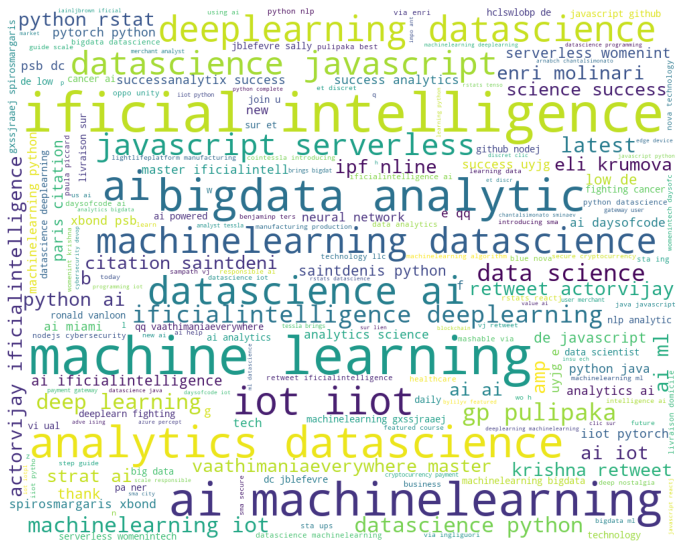



csv is successfully is saved. 

percentage of positive tweets: 36.089061953971346%
percentage of negative tweets: 63.910938046028654%


In [19]:
class TweetObject():
    
    
    client = MongoClient("mongodb://localhost:27017")
    db = client['twitterdb']
    tweets = db['tweet_analysis']
    df = pd.DataFrame(list(tweets.find()))
    #print(df)
    
    def clean_tweets(self,data):
    # text preprocessing
        
        stopword_list = stopwords.words('english')
        ps=PorterStemmer()
        wordnet_lemmatizer = WordNetLemmatizer()
        df["clean_tweets"] = None
        df['len'] = None
        for i in range(0,len(df['text'])):
            # get rid of anything that isnt a letter

            exclusion_list = ['[^a-zA-Z]','rt', 'http', 'co', 'RT']
            exclusions = '|'.join(exclusion_list)
            text = re.sub(exclusions, ' ' , df['text'][i])
            text = text.lower()
            words = text.split()
            words = [wordnet_lemmatizer.lemmatize(word) for word in words if not word in stopword_list]
             # only use stem of word
            #words = [ps.stem(word) for word in words]
            df['clean_tweets'][i] = ' '.join(words)
            #print(df)

        # Create column with data length
        df['len'] = np.array([len(tweet) for tweet in df["clean_tweets"]])


        return df
    
    def sentiment(self,tweet):
        
        analysis = TextBlob(tweet)
    
        if analysis.sentiment.polarity >0:
            return 1
        #elif analysis.sentiment.polarity == 0:
         #   return 0
        else:
            return -1

    
    def save_to_csv(self,df):
        try:
            df.to_csv('clean_tweets.csv')
            print('\n')
            print('csv is successfully is saved. \n')
            
        except Error as e:
            print(e)
    
    def word_cloud(self,df):
        plt.subplots(figsize = (12,10))
        wordcloud = WordCloud(background_color='white',width=1000,height=800).generate(" ".join(df['clean_tweets']))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()

if __name__ == '__main__':
    t=TweetObject()
    data = t.df
    data = t.clean_tweets(data)
    data['Sentiment'] = np.array([t.sentiment(x) for x in data['clean_tweets']])
    t.word_cloud(data)
    t.save_to_csv(data[['clean_tweets','Sentiment']])
    
    
    pos_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] > 0]
    neg_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] < 0]
    #neu_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] == 0]

	#Print results
    print("percentage of positive tweets: {}%".format(100*(len(pos_tweets)/len(data['clean_tweets']))))
    print("percentage of negative tweets: {}%".format(100*(len(neg_tweets)/len(data['clean_tweets']))))
   # print("percentage of neutral tweets: {}%".format(100*(len(neu_tweets)/len(data['clean_tweets']))))
    
    

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
data = pd.read_csv('clean_tweets.csv',usecols=[1,2],names=['text','target'],encoding='utf-8',sep=',').reset_index(drop=True)
data = data.drop([0,0])
data

,text,target
1,machine learning distributed dask using amazon...,-1
2,realmleviticus top python programming language...,1
3,eli krumova classification localization conve ...,-1
4,axelrod eric ificial intelligence automation a...,-1
5,omkar raii agritech sta ups like agnextworld i...,-1
...,...,...
20027,intuitibits ai ool add suppo capturing l traff...,-1
20028,xsllabs xsl syl sylare,-1
20029,czds pga tour sign aws look ai engagement driv...,-1
20030,strat ai build chatbot deeplearning scratch l ...,-1


In [22]:
# train test split
train,test = train_test_split(data,test_size=0.20)
print(len(train))
print(len(test))
data.head()

16024
4007


,text,target
1,machine learning distributed dask using amazon...,-1
2,realmleviticus top python programming language...,1
3,eli krumova classification localization conve ...,-1
4,axelrod eric ificial intelligence automation a...,-1
5,omkar raii agritech sta ups like agnextworld i...,-1


In [23]:
train['text']

14905    iainljbrown ificial intelligence ai tool reali...
15448    senxhq needed database capable ingesting amp p...
8600     deeplearn fighting cancer ai machinelearning g...
18760    open source machine learning framework carry s...
19118    ai transforming manufacturing industrial iot v...
                               ...                        
8389     gazprom engineer enginering erbil basra baghda...
17141    thingsofiot microsoft hiring pa ner technology...
15805    domain perfect dorkgsojba premium domainname f...
6167     th annual kes conference szczecin poland amp v...
2961     benjaminp ters kazuo ishiguro us ificial intel...
Name: text, Length: 16024, dtype: object

<font color='grey'>

### Feature engineering (bag-of-words)

Even after cleaning, like all ML models, SVMs cannot understand text. What we mean by this is that our model cannot take in the raw text as an input. We have to first represent the text in a mathematical way. In other words, we must transform the tweets into model features. One way to do this is by using N-grams.

N-grams are sets of N consecutive words. In Figure 2, we see an example of how a sentence is broken down into 1-grams (unigrams) and 2-grams (bigrams). Unigrams are just the individual words in the sentence. Bigrams are the set of all two consecutive words. Trigrams (3-grams) would be the set of all 3 consecutive words and so on. You can represent text mathematically by simply counting the number of times certain N-grams occur.
<img src='unigram and bigram example.png'>

For our problem, we take the 1000 most common unigrams/ bigrams from our tweets. That is, we count the number of times these N-grams occur in our corpus of cleaned tweets and take the top 1000. To create model features, we then count the number of times these N-grams occur in each of the tweets. This approach is known as bag-of-words.

Table 3 gives an example of a feature matrix created using this approach. The top row gives each of the 1000 N-grams. There is a numbered row for each of the tweets. The numbers within the matrix give the number of times that N-gram occurs within the tweet. For example, “sorry” occurs once in tweet 2. Essentially, we are representing each of tweets as a vector. In other words, we are vectorising our tweets using counts of N-grams.
    
<img src='Feature matrix using bag-of-words.png'>

The code below is used to create one of these feature matrices. We start by splitting our dataset into a training (80%) and testing (20%) set. In line 6, we define a CountVectoriser that will use vectorise our tweets using the top 1000 unigrams/bigrams. In line 7, we use this to vectorize our **training set**. The **.fit_transform()** function will first obtain the 1000 most common N-grams and then count the number of times they occur in each tweet.
    
</font>

In [24]:
# Create count vectoriser 
vectorizer = CountVectorizer(ngram_range=(1, 2)
                            ,max_features=1000)

# Transform training corpus into feature matrix
X = vectorizer.fit_transform(train['text'].values.astype('U'))   # cover dtype to unicode for text col in train data
feature_names = vectorizer.get_feature_names()

x_train = pd.DataFrame(data=X.toarray(),columns=feature_names)
y_train = train['target']

<font color='grey'>

We follow a similar process to vectorise our **testing set**. In this case, we use the **.transform()** function. This will count the number of times each N-gram occurs using the same list as the training set. It is important to use the same list of N-grams to vectorise each set. Using a different list for the testing set would cause the model to make incorrect prediction
</font>

In [25]:
# Transform testing corpus into feature matrix
X = vectorizer.fit_transform(test['text'].values.astype('U'))   # cover dtype to unicode for text col in train data

x_test = pd.DataFrame(data=X.toarray(),columns=feature_names)
y_test = test['target']

<font color='grey'>

Finally, we scale the feature matrix using min-max scaling. This ensures all our features are in the same range. This is important as SVMs can be influenced by features with large values. As with the list of N-grams, we scale both sets in the same way (i.e. using the max and min values from the training set).

</font>

In [26]:
# Min-Max scalling

x_max = x_train.max()
x_min = x_train.min()

x_train = (x_train - x_min)/x_max
x_test = (x_test - x_min)/x_max

print(len(x_test))
x_test.head()

4007


,aarp,aarp innovation,aarpilabs,ac,accelerate,across,activation,activation function,actorvijay,actorvijay ificialintelligence,...,world,would,xbond,xbond psb,year,yet,youtube,yukarikingdom,yukarikingdom mhall,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color='grey'>

We have transformed our testing set, using N-grams and scaling weights obtained from the training set. As mentioned, this is done so that both sets are vectorised in the same way. It is also done to avoid data leakage. In practice, our model will be used on new/unseen tweets. These tweets, along with their N-grams and weights, would not be available during training. So, to get a better indication of future performance our model should be tested on a set that has been treated as unseen.

### Modelling

With our training and testing set ready, we can now train our model. We do this in line 2 in the code below. Here we train an SVM on our training set. Specifically, we use an SVM with a linear kernel and set the penalty parameter to 1. In line 5, we use this model to make predictions on the testing set and in line 8 we calculate the accuracy of these predictions.
</font>

In [27]:
from sklearn.model_selection import cross_val_score
def svm_kfold(C):
    """
    Returns the k_fold cross-validation accuracy for a given C parameter
    params
    ------------
        C: int
    """
    clf = svm.SVC(kernel='linear', C=C)
    scores = cross_val_score(clf,
                         X = x_train, 
                         y = y_train, 
                         cv=5,
                         n_jobs=-1)
    
    score = round(np.mean(scores),2)
    return score

In [28]:
#tune C hyper-parameter
print("C Parameter:")
for C in [0.001,0.01,0.1,1,10]:
    score = svm_kfold(C)
    print("{}: {}".format(C,score))

C Parameter:
0.001: 0.65
0.01: 0.76
0.1: 0.9
1: 0.92
10: 0.93


In [41]:
model = svm.SVC(kernel='linear',C=0.01).fit(x_train,y_train)

# get predictions on test set
y_pred = model.predict(x_test)

# accuracy on test
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.641876715747442


    In the end, the model had an accuracy of 60.0% on the testing set. We can dive a bit deeper into the model’s performance by looking at the confusion matrix in Figure 2. There are 892 false negatives compare to 459 false positives. In other words, less of the errors come from the model incorrectly predicting tweets with a negative sentiment as having a positive sentiment. So, for a first draft, our model is not too bad but there is a lot of room for improvement.

Text(0.5, 61.421875, 'Predicted')

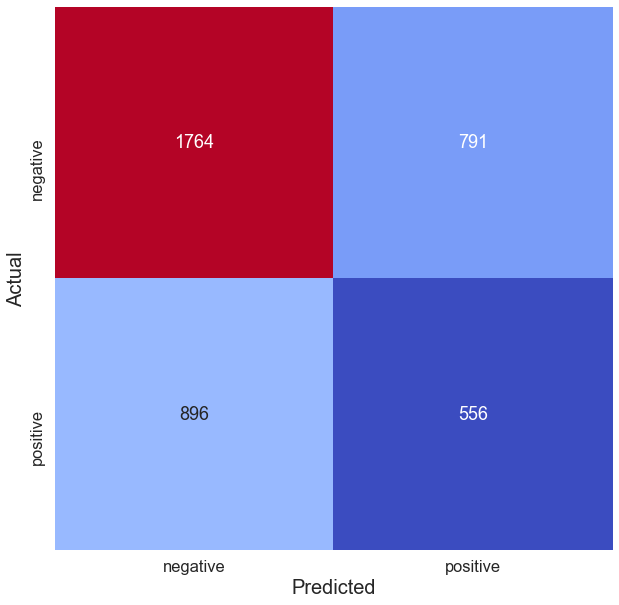

In [33]:
#create confusion matrix
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confucion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=20)
plt.xlabel('Predicted',size=20)


#plt.savefig(path + 'conf_matrix.png',format='png',dpi=150)

    We can improve our model's performance in a few ways. We can spend more time tunning the model’s hyperparameters. As mentioned above, we have set the penalty parameter to 1. This was actually chosen after testing a few different values (i.e. 0.001, 0.01, 0.1, 1 and 10) and seeing which one had the highest k-fold cross-validation accuracy. Other hyperparameters, such as the kernel and text cleaning steps, can be tuned in the same way. We could also interpret our model, figure out how it works and make changes based on these findings.

### Interpreting our model

    One way of interpreting an SVM is by looking at the model weights/ coefficients. Through the process of training the SVM, every N-gram in the training set is given a weighting. N-grams with positive weighting are associated with positive sentiment. Similarly, those with negative weights are associated with negative sentiment.

    In Figure 3, we visualise the coefficient of 15 of the 1000 N-grams. The first 5 all have high positive coefficients. This makes sense as you probably expected tweets with words like ‘happy’ or ‘smile’ to have a positive sentiment. Similarly, the words with negative coefficients: ‘bored’, ‘hate’, etc… would be associated with negative sentiment. Notice that there are also N-grams that have coefficients close to 0.

In [34]:
# Find positive coef examples
coef = pd.DataFrame({'feature':feature_names, 'coef': model.coef_[0]})
coef = coef.sort_values('coef',ascending=False)
coef.head()

,feature,coef
905,top,11.902450
80,better,9.116029
503,light,8.285360
524,love,8.271517
79,best,8.016597


In [35]:
# Find negative coef examples
coef = pd.DataFrame({'feature':feature_names, 'coef': model.coef_[0]})
coef = coef.sort_values('coef')
coef.head(10)

,feature,coef
759,retail,-5.000000
97,blue,-4.340570
133,chidambara,-4.165377
678,photo,-3.661203
340,game,-3.551684
225,del,-3.156340
562,mean,-3.031709
741,reactjs,-2.884541
689,pour,-2.848124
406,iiot python,-2.755639


In [36]:
# Find neutral coef examples 
coef[round(coef.coef,1)==0][0:5]

,feature,coef
738,rd,-0.040973
115,capability,-0.038957
973,way,-0.038346
21,ai ificialintelligence,-0.037478
648,ol,-0.036912


([<matplotlib.axis.YTick at 0x7fb270636b20>,
 [Text(0, 0, 'bit'),
  Text(0, 1, 'already'),
  Text(0, 2, 'intelligence ai'),
  Text(0, 3, 'billion'),
  Text(0, 4, 'announces'),
  Text(0, 5, 'deep learning'),
  Text(0, 6, 'devcommunity programming'),
  Text(0, 7, 'programming'),
  Text(0, 8, 'step'),
  Text(0, 9, 'generated'),
  Text(0, 10, 'researcher'),
  Text(0, 11, 'uyjg'),
  Text(0, 12, 'home'),
  Text(0, 13, 'robot'),
  Text(0, 14, 'bot')])

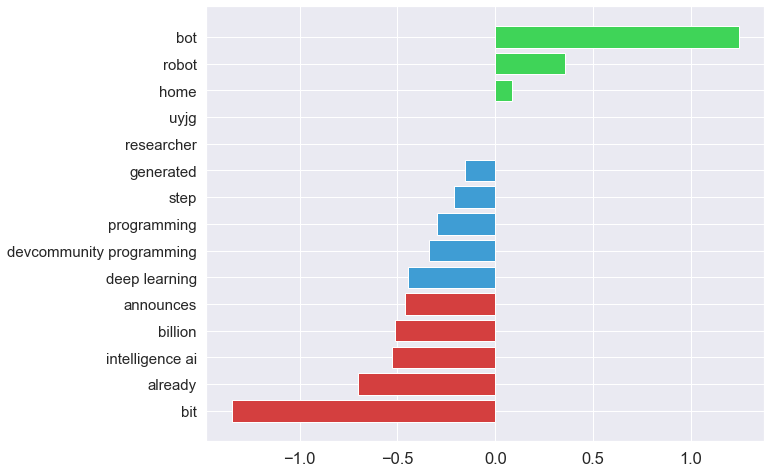

In [37]:
#Create a dataset of model coefs
coef = pd.DataFrame({'feature_names':feature_names, 'coef': model.coef_[0]})

#Get some example coefs
example = coef.loc[[100,435,385,755,769,
                     845,218,948,54,92,
                     711,345,34,234,93]
                    ].sort_values('coef')
#Plot coefs
plt.figure(figsize=(10,8))
ticks = range(len(example))
color = ['#d43f3f']*5 + ['#3f9dd4']*5 + ['#3fd458']*5
plt.barh(ticks, example.coef,color=color, align='center')
plt.yticks(ticks, example.feature_names,size=15)

#plt.savefig(path + 'coef_weights.png',format='png',dpi=150)

    N-grams with small coefficients would not have much impact on our model’s predictions. The coefficients could be small because the N-grams tend to occur in tweets with both positive and negative sentiment. In other words, they do not tell us anything about a tweet’s sentiment. Like with stopwords, we could remove these words and hopefully improve the performance of our model.
    
    Hyper-parameter tuning and model interpretation are some of the many ways we can improve accuracy. You may also get better results by experimenting with different models like Neural Networks. Instead of bag-of-words, you could use more advanced techniques, like word embeddings, to vectorise the tweets. There are so many options and hopefully, this article has given you a good starting point.